<a href="https://colab.research.google.com/github/sanjanavegge/AND-internship/blob/main/medicine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/stedy/machine-learning-with-r-datasets/master/insurance.csv')
print(data.shape)
data.sample(5)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
82,22,male,37.620,1,yes,southeast,37165.16380
909,32,female,24.600,0,yes,southwest,17496.30600
432,42,male,26.900,0,no,southwest,5969.72300
934,32,male,37.180,2,no,southeast,4673.39220
862,55,female,33.535,2,no,northwest,12269.68865


In [ ]:
data.isnull().sum().sum()

0

In [ ]:
#variables setting
x=data.copy()
x=x.drop('charges',axis=1)
x['smoker'].replace(['yes','no'],[1,0],inplace=True)
x['sex'].replace(['female','male'],[1,0],inplace=True)
x['region'].replace(['southwest','northwest','southeast','northeast'],[3,2,1,0],inplace=True)
y=data['charges']
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 62.8 KB


In [ ]:
#split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=12)

In [ ]:
#datascaling
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
#build model ann
#dense function adds layers
model=Sequential()
model.add(Dense(64,input_dim=6,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(54, activation='relu'))
model.add(Dropout(0.18))
model.add(Dense(1))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 40)                2600      
                                                                 
 dropout_2 (Dropout)         (None, 40)                0         
                                                                 
 dense_3 (Dense)             (None, 54)                2

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics= ['mse'])

In [ ]:
history=model.fit(x_train_scaled,y_train,validation_split=0.25, epochs=200)

Epoch 1/200
26/26 [==============================] - 2s 18ms/step - loss: 321992032.0000 - mse: 321992032.0000 - val_loss: 331388672.0000 - val_mse: 331388672.0000
Epoch 2/200
26/26 [==============================] - 0s 6ms/step - loss: 321518784.0000 - mse: 321518784.0000 - val_loss: 330209760.0000 - val_mse: 330209760.0000
Epoch 3/200
26/26 [==============================] - 0s 6ms/step - loss: 318263520.0000 - mse: 318263520.0000 - val_loss: 323090080.0000 - val_mse: 323090080.0000
Epoch 4/200
26/26 [==============================] - 0s 6ms/step - loss: 302015104.0000 - mse: 302015104.0000 - val_loss: 293095008.0000 - val_mse: 293095008.0000
Epoch 5/200
26/26 [==============================] - 0s 6ms/step - loss: 246249824.0000 - mse: 246249824.0000 - val_loss: 209243488.0000 - val_mse: 209243488.0000
Epoch 6/200
26/26 [==============================] - 0s 7ms/step - loss: 142681632.0000 - mse: 142681632.0000 - val_loss: 93916072.0000 - val_mse: 93916072.0000
Epoch 7/200
26/26 [====

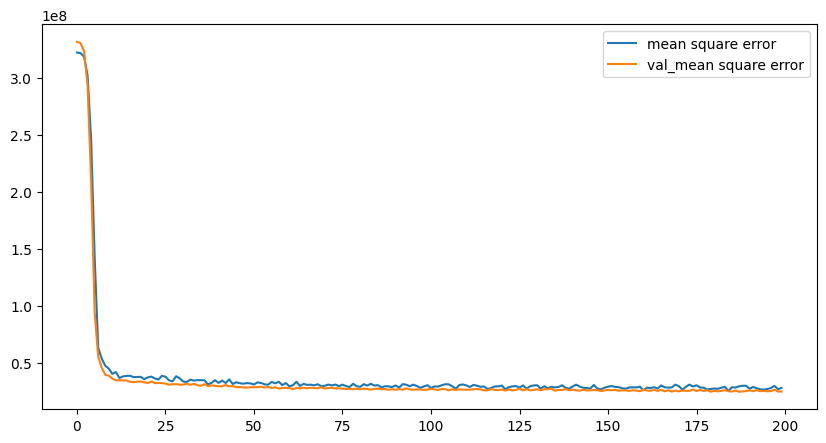

In [ ]:
#evaluation done through mse
import matplotlib.pyplot as plt
#plotting loss n validation loss
plt.figure(figsize=(10,5))
plt.plot(history.history['mse'],label="mean square error")
plt.plot(history.history['val_mse'],label='val_mean square error')
plt.legend()

In [ ]:
from sklearn.metrics import r2_score
y_pred=model.predict(x_test_scaled)
print('r2 score:', r2_score(y_test, y_pred))

9/9 [==============================] - 0s 3ms/step
r2 score: 0.7951862958050844


9/9 [==============================] - 0s 2ms/step


[]

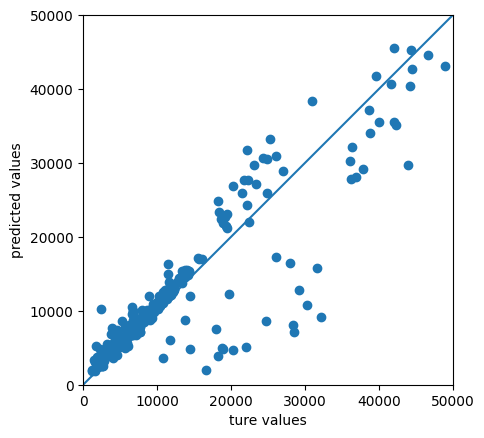

In [ ]:
y_pred=model.predict(x_test_scaled).flatten()
a=plt.axes(aspect='equal')
plt.scatter(y_test,y_pred)
plt.xlabel('ture values')
plt.ylabel('predicted values')
plt.xlim([0,50000])
plt.ylim([0,50000])
plt.plot([0,50000],[0,50000])
plt.plot()

In [ ]:
x_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [ ]:
sample=[[28,1,20,3,0,3]]

In [ ]:
print(model.predict(scaler.transform(sample)))

1/1 [==============================] - 0s 37ms/step
[[7005.178]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
